In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sklearn.manifold import TSNE

In [5]:
# Loading the iris datset
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# X_embedded = TSNE(n_components=2).fit_transform(iris.data)
X_embedded = TSNE(learning_rate = 100).fit_transform(iris.data)
X_embedded.shape

(150, 2)

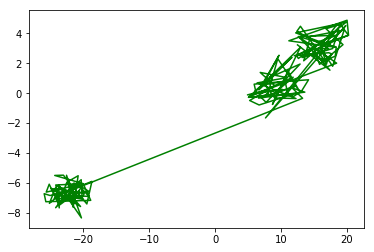

In [29]:
plt.plot( X_embedded[:,0], X_embedded[:,1] , 'g')

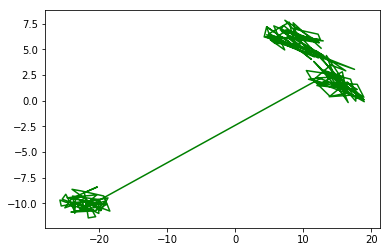

In [26]:
plt.plot( X_embedded[:,0], X_embedded[:,1] , 'g')

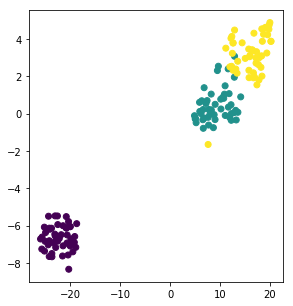

In [38]:
figure(figsize = (10,5) )
subplot(121)
scatter(X_embedded[:,0], X_embedded[:,1], c = iris.target  )

In [46]:
x_min = X_embedded[:,0].min()

In [47]:
x_max = X_embedded[:,0].max()

In [48]:
y_min = X_embedded[:,1].min()
y_max = X_embedded[:,1].max()

In [49]:
Limts = [ [ x_min , x_max] , [y_min, y_max] ]

In [50]:
Limts

[[-25.9487, 20.243372], [-8.339147, 4.883639]]

In [89]:
def find_good_size(Limits,windowSize):
    x_min = Limits[0][0]
    x_max = Limits[0][1]
    y_min = Limits[1][0]
    y_max = Limits[1][1]
    from math import floor , ceil
    # Clean the matrix
    x_min = floor(x_min)
    x_max = ceil(x_max)
    y_min = floor(y_min)
    y_max = ceil(y_max)
    
    # Printing the cleaend up values.
    print(x_min,x_max,y_min, y_max)
    
    # Fitting the size to handle the windows
    a = (x_max - x_min) % windowSize
    b = (y_max - y_min) % windowSize
    
    if ( (x_max + a) % windowSize == 0):
        x_max = x_max + a
    else:
        x_max = x_max + (windowSize - a)
    
    if ( (y_max + b) % windowSize == 0):
        y_max = y_max + b
    else:
        y_max = y_max + (windowSize - b)
        
    print("You Can use this matrix now.")
    print("X_min=",x_min)
    print("X_max=",x_max)
    print("Y_min=",y_min)
    print("Y_max=",y_max)
    print("And the Matrix Shape:", (x_max - x_min) , " * ", (y_max - y_min))
    return [[x_min,x_max],[y_min,y_max]]
    

In [90]:
find_good_size(Limts,1)

-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 21
Y_min= -9
Y_max= 5
And the Matrix Shape: 47  *  14


[[-26, 21], [-9, 5]]

In [66]:
find_good_size(Limts,10)

-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 24
Y_min= -9
Y_max= 11
And the Matrix Shape: 50  *  20


[[-26, 24], [-9, 11]]

In [91]:
def tell_windows(Limts,windowSize):
    g = find_good_size(Limts,windowSize)
    # Going Row Wise:
    count = 0
    for i in range(g[0][0],g[0][1],windowSize):
        for j in range(g[1][0],g[1][1],windowSize):
            count += 1
            print("<Window:",count,">","X:[", i, ",", i +windowSize , "]" , "Y:[", j, ",", j+ windowSize ,"]")
    print("Total Count:",count)
    ans = (g[0][1]-g[0][0])*(g[1][1]-g[1][0]) // (windowSize ** 2)
    print("Expected Count:",ans)
    print("OKAY:", count == ans )

In [93]:
tell_windows([[0,3],[0,3]],1)

0 3 0 3
You Can use this matrix now.
X_min= 0
X_max= 3
Y_min= 0
Y_max= 3
And the Matrix Shape: 3  *  3
<Window: 1 > X:[ 0 , 1 ] Y:[ 0 , 1 ]
<Window: 2 > X:[ 0 , 1 ] Y:[ 1 , 2 ]
<Window: 3 > X:[ 0 , 1 ] Y:[ 2 , 3 ]
<Window: 4 > X:[ 1 , 2 ] Y:[ 0 , 1 ]
<Window: 5 > X:[ 1 , 2 ] Y:[ 1 , 2 ]
<Window: 6 > X:[ 1 , 2 ] Y:[ 2 , 3 ]
<Window: 7 > X:[ 2 , 3 ] Y:[ 0 , 1 ]
<Window: 8 > X:[ 2 , 3 ] Y:[ 1 , 2 ]
<Window: 9 > X:[ 2 , 3 ] Y:[ 2 , 3 ]
Total Count: 9
Expected Count: 9
OKAY: True


In [94]:
tell_windows([[0,3],[0,3]],3)

0 3 0 3
You Can use this matrix now.
X_min= 0
X_max= 3
Y_min= 0
Y_max= 3
And the Matrix Shape: 3  *  3
<Window: 1 > X:[ 0 , 3 ] Y:[ 0 , 3 ]
Total Count: 1
Expected Count: 1
OKAY: True


In [95]:
tell_windows([[0,3],[0,3]],5)

0 3 0 3
You Can use this matrix now.
X_min= 0
X_max= 5
Y_min= 0
Y_max= 5
And the Matrix Shape: 5  *  5
<Window: 1 > X:[ 0 , 5 ] Y:[ 0 , 5 ]
Total Count: 1
Expected Count: 1
OKAY: True


In [77]:
Limts

[[-25.9487, 20.243372], [-8.339147, 4.883639]]

In [103]:
# Okay So now We have a function which finds the windows we just now need to calculate the entropy in this window.
def calEntropy(window,label):
    'Takes: [x_min, x_max],[y_min, y_max]'
    'returns entropy of the window'
    x_min, x_max , y_min, y_max = window
    # Set up entropy to be zero
    en = 0
    from math import log
    c = [0,0,0]
    # Calculate the number of samples in this window.
    # X_embedded stores the data.
    for i in range(150):
        cx = X_embedded[i][0]
        cy = X_embedded[i][1]
        if x_min <= cx <=x_max and y_min <= cy <= y_max:
            print("Found a sample of class:",label[i])
            c[label[i]] += 1
    t = c[0] + c[1] + c[2]
    for i in c:
        if i!= 0:
            en += - ( i/t * log(i/t) )
    print("Found Entropy:",en)
    return en   

In [109]:
def tell_windows(Limts,windowSize,target):
    g = find_good_size(Limts,windowSize)
    # Going Row Wise:
    total_ent = 0
    count = 0
    for i in range(g[0][0],g[0][1],windowSize):
        for j in range(g[1][0],g[1][1],windowSize):
            count += 1
            print("<Window:",count,">","X:[", i, ",", i +windowSize , "]" , "Y:[", j, ",", j+ windowSize ,"]")
            total_ent += calEntropy([i,windowSize+i, j, windowSize+j], target)
    print("Total Count:",count)
    ans = (g[0][1]-g[0][0])*(g[1][1]-g[1][0]) // (windowSize ** 2)
    print("Expected Count:",ans)
    print("OKAY:", count == ans )
    print("-----Done----",total_ent)
    return total_ent

In [1]:
def add_noise(percentage):
    'Adds the given percentage of noise to the iris data and returns the new data'
    # Original 
    target = [0 for i in range(50)] + [ 1 for i in range(50)] + [ 2 for i in range(50)]  
    # 0   - 50   : class 0 
    # 50 - 100   : class 1
    # 100 - 150  : class 2
    # We will change the labels in a class label randomly
    import random
    # Offset for percentage => (window size)* precentage
    offset = 50 * percentage // 100
    for i in range(0, 0 + offset ):
        target[i] = random.choice([1,2])
    for i in range(50, 50 + offset):
        target[i] = random.choice([0,2])
    for i in range(100,100 + offset):
        target[i] = random.choice([0,1])
    
    # Got the new labeled data
    # Now we can plot the tsne with this.
    #print("Plotting the data with Noise => ", percentage , " %")
    figure( figsize = (20,10))
    subplot(242)
    scatter(X_embedded[:,0], X_embedded[:,1], c = target)
    print("Done!")
    return target

In [115]:

def main(windowSize, noise):
    return tell_windows(Limts,windowSize,add_noise(noise))

In [ ]:
xxxx = []
yyyy = []
for i in range(0,100,10):
    xxxx.append(i)
    yyyy.append(main(3,i))

In [118]:
xxxx

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [119]:
yyyy

[1.9059782130166705,
 5.833869503703472,
 8.146882998185937,
 10.507330121040468,
 13.927450011307299,
 14.301825684532538,
 12.619612365784652,
 15.087570013154586,
 13.689747163330022,
 13.465812334559693]

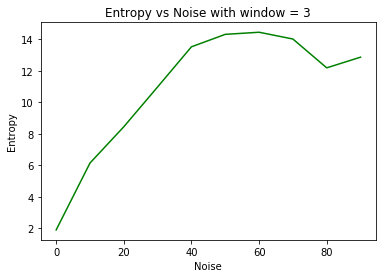

In [120]:
plt.plot(x,y,'g')
plt.xlabel('Noise')
plt.ylabel('Entropy')
plt.title('Entropy vs Noise with window = 3')
plt.show()

In [ ]:
xxxx = []
yyyy = []
for i in range(0,100,10):
    xxxx.append(i)
    yyyy.append(main(1,i))

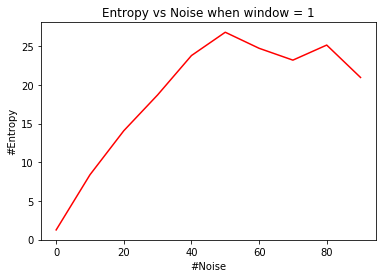

In [122]:
plt.plot(xxxx,yyyy,'r')
plt.xlabel('#Noise')
plt.ylabel('#Entropy')
plt.title('Entropy vs Noise when window = 1')
plt.show()

In [126]:
dataSet

[[[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [1.2554823251787535,
   8.73851878067532,
   13.853681503172105,
   18.878635726235473,
   25.02940503282032,
   28.127269243771856,
   26.30719326841124,
   25.858124148322695,
   21.792007983531576,
   22.716655925390782]],
 [[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [1.9059782130166705,
   5.906832364815045,
   8.501479237313205,
   10.879963858860972,
   14.168158576926993,
   14.028571586277163,
   14.32908036737314,
   13.426159812900783,
   12.847992308871694,
   13.64677921343577]],
 [[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [0.8377336454040922,
   3.1059009623027247,
   4.348245698116212,
   6.66788264811653,
   7.452498242994488,
   7.6894883073824065,
   7.321481995767062,
   7.438085109160104,
   6.891550087350982,
   7.177780753797773]]]

In [131]:
print("The final plots are")
def plotter(i):
    plt.plot(dataSet[i][0],dataSet[i][1])
    plt.title('Window Size = ' + str(i))
    plt.xlabel('Noise')
    plt.ylabel('Entropy')  

The final plots are


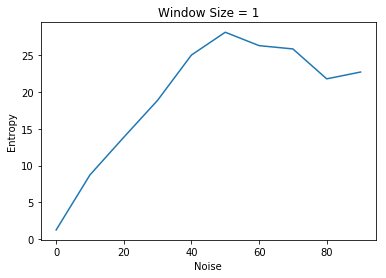

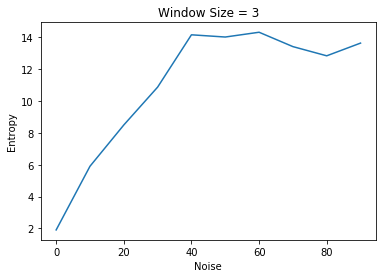

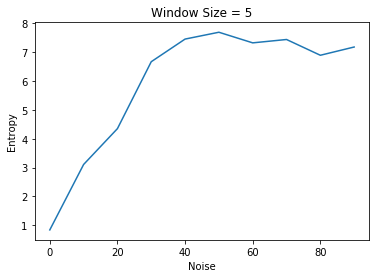

In [130]:
plotter(1)
plotter(3)
plotter(5)

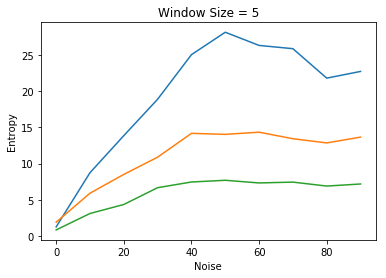

In [132]:
plotter(1)
plotter(3)
plotter(5)
plt.show()

In [133]:
# Done !

In [2]:
from sklearn.datasets import make_s_curve

In [3]:
data  = make_s_curve(1000)

In [4]:
X , color = data

In [15]:
color

array([ 4.62590248, -0.74717365, -0.8089283 ,  0.64600174, -1.00856807,
       -1.35994855,  0.30382899,  0.85694722,  1.09691957,  2.86387081,
       -2.43520539,  3.10044656,  0.53626378,  1.54424571, -1.73270459,
        2.8778216 , -3.07983758,  3.61810578,  2.6289297 , -0.19716788,
        2.73497637,  0.86716022, -1.24633255, -2.9416969 ,  0.85888346,
        3.69539385, -4.0929808 ,  0.99843329,  3.48273766, -2.24468944,
       -0.95683651, -2.12659622, -3.298821  , -1.17963896, -4.34202165,
        2.62842537, -2.13055023,  3.3530965 , -0.64357187,  0.07174887,
        4.13946263, -1.77985322, -3.23064293, -2.75697064, -3.61175332,
       -3.91048314, -3.292621  , -2.96919097, -1.75862586,  2.99718299,
       -1.92288939,  0.07895313,  1.65438796, -2.80766226, -4.67137716,
       -0.61427325, -1.06844967, -1.28020641, -1.50579134, -1.14350657,
       -2.15996905,  2.53145053, -4.56041779, -4.70760096, -2.71422103,
       -1.53439067, -1.05214014,  3.78771644, -0.12673047, -2.60

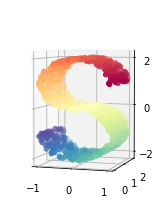

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
Axes3D

fig = plt.figure( figsize = (15, 8))
ax = fig.add_subplot(251, projection = '3d')
ax.scatter( X[:,0] , X[:,1], X[:,2], c=color, cmap = plt.cm.Spectral)
ax.view_init(4,-72)

done


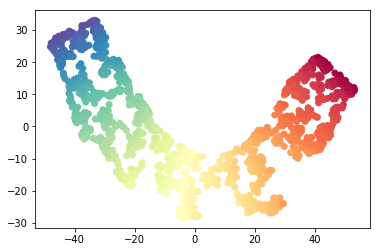

In [7]:
# The shape of the data is as shown above
# Now we apply the tsne on this reduced dataset
from sklearn import manifold
tsne = manifold.TSNE(n_components = 2)
Y = tsne.fit_transform(X)

print("done")
ax = fig.add_subplot(2,5,10)
plt.scatter(Y[:,0],Y[:,1], c=color, cmap = plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

In [21]:
# Now applying the window and the weights
color

array([ 4.62590248, -0.74717365, -0.8089283 ,  0.64600174, -1.00856807,
       -1.35994855,  0.30382899,  0.85694722,  1.09691957,  2.86387081,
       -2.43520539,  3.10044656,  0.53626378,  1.54424571, -1.73270459,
        2.8778216 , -3.07983758,  3.61810578,  2.6289297 , -0.19716788,
        2.73497637,  0.86716022, -1.24633255, -2.9416969 ,  0.85888346,
        3.69539385, -4.0929808 ,  0.99843329,  3.48273766, -2.24468944,
       -0.95683651, -2.12659622, -3.298821  , -1.17963896, -4.34202165,
        2.62842537, -2.13055023,  3.3530965 , -0.64357187,  0.07174887,
        4.13946263, -1.77985322, -3.23064293, -2.75697064, -3.61175332,
       -3.91048314, -3.292621  , -2.96919097, -1.75862586,  2.99718299,
       -1.92288939,  0.07895313,  1.65438796, -2.80766226, -4.67137716,
       -0.61427325, -1.06844967, -1.28020641, -1.50579134, -1.14350657,
       -2.15996905,  2.53145053, -4.56041779, -4.70760096, -2.71422103,
       -1.53439067, -1.05214014,  3.78771644, -0.12673047, -2.60

In [8]:
def modified_class_getter(color):
    from math import ceil
    new_color = []
    for i in color:
        new_color.append(ceil(i))
    return new_color

In [9]:
n_color = modified_class_getter(color)

In [10]:
def find_good_size(Limits,windowSize):
    x_min = Limits[0][0]
    x_max = Limits[0][1]
    y_min = Limits[1][0]
    y_max = Limits[1][1]
    from math import floor , ceil
    # Clean the matrix
    x_min = floor(x_min)
    x_max = ceil(x_max)
    y_min = floor(y_min)
    y_max = ceil(y_max)
    
    # Printing the cleaend up values.
    print(x_min,x_max,y_min, y_max)
    
    # Fitting the size to handle the windows
    a = (x_max - x_min) % windowSize
    b = (y_max - y_min) % windowSize
    
    if ( (x_max + a) % windowSize == 0):
        x_max = x_max + a
    else:
        x_max = x_max + (windowSize - a)
    
    if ( (y_max + b) % windowSize == 0):
        y_max = y_max + b
    else:
        y_max = y_max + (windowSize - b)
        
    print("You Can use this matrix now.")
    print("X_min=",x_min)
    print("X_max=",x_max)
    print("Y_min=",y_min)
    print("Y_max=",y_max)
    print("And the Matrix Shape:", (x_max - x_min) , " * ", (y_max - y_min))
    return [[x_min,x_max],[y_min,y_max]]
    

In [11]:
X_embedded = Y
x_min = X_embedded[:,0].min()
x_max = X_embedded[:,0].max()
y_min = X_embedded[:,1].min()
y_max = X_embedded[:,1].max()


In [12]:
Lmts = [[x_min,x_max], [y_min, y_max]]

In [13]:
Lmts

[[-48.031948, 53.174355], [-28.483036, 33.060825]]

In [14]:
def tell_windows(Limts,windowSize):
    g = find_good_size(Limts,windowSize)
    # Going Row Wise:
    count = 0
    for i in range(g[0][0],g[0][1],windowSize):
        for j in range(g[1][0],g[1][1],windowSize):
            count += 1
            print("<Window:",count,">","X:[", i, ",", i +windowSize , "]" , "Y:[", j, ",", j+ windowSize ,"]")
    print("Total Count:",count)
    ans = (g[0][1]-g[0][0])*(g[1][1]-g[1][0]) // (windowSize ** 2)
    print("Expected Count:",ans)
    print("OKAY:", count == ans )

In [15]:
# Okay So now We have a function which finds the windows we just now need to calculate the entropy in this window.
def calEntropy(window,label):
    'Takes: [x_min, x_max],[y_min, y_max]'
    'returns entropy of the window'
    x_min, x_max , y_min, y_max = window
    # Set up entropy to be zero
    en = 0
    from math import log
    c = [0,0,0]
    # Calculate the number of samples in this window.
    # X_embedded stores the data.
    for i in range(150):
        cx = X_embedded[i][0]
        cy = X_embedded[i][1]
        if x_min <= cx <=x_max and y_min <= cy <= y_max:
            print("Found a sample of class:",label[i])
            c[label[i]] += 1
    t = c[0] + c[1] + c[2]
    for i in c:
        if i!= 0:
            en += - ( i/t * log(i/t) )
    print("Found Entropy:",en)
    return en   

In [16]:
def tell_windows(Limts,windowSize,target):
    g = find_good_size(Limts,windowSize)
    # Going Row Wise:
    total_ent = 0
    count = 0
    for i in range(g[0][0],g[0][1],windowSize):
        for j in range(g[1][0],g[1][1],windowSize):
            count += 1
            print("<Window:",count,">","X:[", i, ",", i +windowSize , "]" , "Y:[", j, ",", j+ windowSize ,"]")
            total_ent += calEntropy([i,windowSize+i, j, windowSize+j], target)
    print("Total Count:",count)
    ans = (g[0][1]-g[0][0])*(g[1][1]-g[1][0]) // (windowSize ** 2)
    print("Expected Count:",ans)
    print("OKAY:", count == ans )
    print("-----Done----",total_ent)
    return total_ent

In [17]:
def add_noise(percentage):
    'Adds the given percentage of noise to the iris data and returns the new data'
    # Original 
    target = [0 for i in range(50)] + [ 1 for i in range(50)] + [ 2 for i in range(50)]  
    # 0   - 50   : class 0 
    # 50 - 100   : class 1
    # 100 - 150  : class 2
    # We will change the labels in a class label randomly
    import random
    # Offset for percentage => (window size)* precentage
    offset = 50 * percentage // 100
    for i in range(0, 0 + offset ):
        target[i] = random.choice([1,2])
    for i in range(50, 50 + offset):
        target[i] = random.choice([0,2])
    for i in range(100,100 + offset):
        target[i] = random.choice([0,1])
    
    # Got the new labeled data
    # Now we can plot the tsne with this.
    #print("Plotting the data with Noise => ", percentage , " %")
    figure( figsize = (20,10))
    subplot(242)
    scatter(X_embedded[:,0], X_embedded[:,1], c = target)
    print("Done!")
    return target

In [18]:

def main(windowSize, noise):
    return tell_windows(Limts,windowSize,add_noise(noise))

In [19]:
# Sort the class
dataTp = [ [ n_color[i], X_embedded[i] ] for i in range(len(n_color)) ]

In [20]:
print("There are ",len(dataTp)," Samples")

There are  1000  Samples


In [21]:
dataTp = sorted(dataTp , key = lambda x : x[0])

In [22]:
set(n_color) 

{-4, -3, -2, -1, 0, 1, 2, 3, 4, 5}

In [23]:
counts  = { -4:0, -3:0, -2:0, -1:0, 0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [24]:
for i in dataTp:
    counts[i[0]] += 1
print("Thre are these many samples:")
print(counts)

Thre are these many samples:
{-4: 70, -3: 95, -2: 112, -1: 116, 0: 103, 1: 115, 2: 100, 3: 118, 4: 95, 5: 76}


In [25]:
dataTp[0]

[-4, array([40.960987, 20.730944], dtype=float32)]

In [26]:
# Data tp Sample is of the form class and then the data setting the limit = 70
counts = { i:0 for i in [-4,-3,-2,-1,0,1,2,3,4,5] }

In [27]:
X_embedded = []
for i in dataTp:
    if counts[i[0]] <70:
        counts[i[0]] += 1
        X_embedded.append(i[1])
print(len(X_embedded))        
        

700


In [74]:
# Now we have 700 samples with proper classes
# Now we are ready to do add noise and others.
def add_noise(percentage):
    'Adds the given percentage of noise to the iris data and returns the new data'
    # Original 
    target = []
    for j in [-4,-3,-2,-1,0,1,2,3,4,5]:
        target += [ j for i in range(70) ]
        
    # 0   - 70   : class -4 
    # 70 - 140   : class -3
    # 100 - 150  : class 2
    # We will change the labels in a class label randomly
    import random
    # Offset for percentage => (window size)* precentage
    offset = 70 * percentage // 100
    for i in range(0, 0 + offset ):
        target[i] = random.choice([-3,-2,-1,0,1,2,3,4,5])
    for i in range(70,70 + offset):
        target[i] = random.choice([-4,-2,-1,0,1,2,3,4,5])
    for i in range(140,140 + offset):
        target[i] = random.choice([-4,-3,-1,0,1,2,3,4,5])
    for i in range(210,210 + offset):
        target[i] = random.choice([-4,-3,-2,0,1,2,3,4,5])
    for i in range(280,280 + offset):
        target[i] = random.choice([-4,-3,-2,-1,1,2,3,4,5])
    for i in range(350,350 + offset):
        target[i] = random.choice([-4,-3,-2,-1,0,2,3,4,5])
    for i in range(420,420 + offset):
        target[i] = random.choice([-4,-3,-2,-1,0,1,3,4,5])
    for i in range(490,490 + offset):
        target[i] = random.choice([-4,-3,-2,-1,0,1,2,4,5])
    for i in range(560,560 + offset):
        target[i] = random.choice([-4,-3,-2,-1,0,1,2,3,5])
    for i in range(630,630 + offset):
        target[i] = random.choice([-4,-3,-2,-1,0,1,2,3,4])    
    
    # Got the new labeled data
    # Now we can plot the tsne with this.
    #print("Plotting the data with Noise => ", percentage , " %")
    print("done")
    ax = fig.add_subplot(2,5,10)
    target = np.array(target)
    plt.scatter(X_embedded[:,0],X_embedded[:,1], c=target, cmap = plt.cm.Spectral)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()
    return target

In [56]:
X_embedded = np.array(X_embedded)

done


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


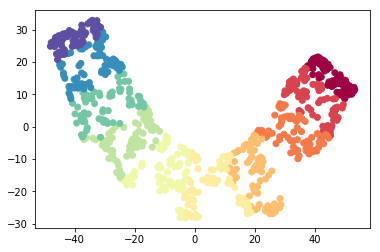

In [57]:
add_noise(0)

done


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


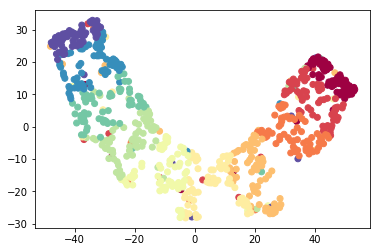

In [58]:
add_noise(10)

done


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


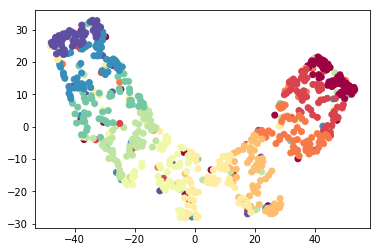

In [59]:
add_noise(20)

done


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


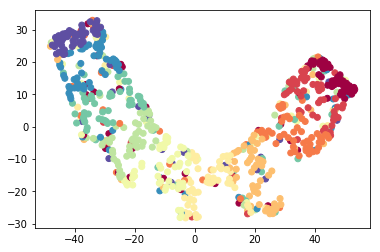

In [60]:
add_noise(30)

done


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


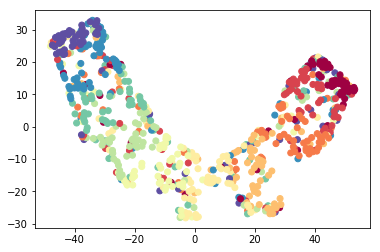

In [61]:
add_noise(40)

In [91]:
# Okay So now We have a function which finds the windows we just now need to calculate the entropy in this window.
def calEntropy(window,label):
    'Takes: [x_min, x_max],[y_min, y_max]'
    'returns entropy of the window'
    x_min, x_max , y_min, y_max = window
    # Set up entropy to be zero
    en = 0
    from math import log
    c = { i:0 for i in [-4,-3,-2,-1,0,1,2,3,4,5] }
    # Calculate the number of samples in this window.
    # X_embedded stores the data.
    for i in range(700):
        cx = X_embedded[i][0]
        cy = X_embedded[i][1]
        if x_min <= cx <=x_max and y_min <= cy <= y_max:
            #print("Found a sample of class:",label[i])
            c[label[i]] += 1
    
    t = 0
    for i in c.keys():
        t += int(c[i])
  
    for i in c.keys():
        if int(c[i])!= 0:
            en += - ( int(c[i])/t * log(int(c[i])/t) )
    #print("Found Entropy:",en)
    return en   

In [87]:
def tell_windows(Limts,windowSize,target):
    g = find_good_size(Limts,windowSize)
    # Going Row Wise:
    total_ent = 0
    count = 0
    for i in range(g[0][0],g[0][1],windowSize):
        for j in range(g[1][0],g[1][1],windowSize):
            count += 1
            #print("<Window:",count,">","X:[", i, ",", i +windowSize , "]" , "Y:[", j, ",", j+ windowSize ,"]")
            total_ent += calEntropy([i,windowSize+i, j, windowSize+j], target)
    #print("Total Count:",count)
    ans = (g[0][1]-g[0][0])*(g[1][1]-g[1][0]) // (windowSize ** 2)
    #print("Expected Count:",ans)
    #print("OKAY:", count == ans )
    #print("-----Done----",total_ent)
    return total_ent

In [88]:

def main(windowSize, noise):
    return tell_windows(Limts,windowSize,add_noise(noise))

In [65]:
Lmts

[[-48.031948, 53.174355], [-28.483036, 33.060825]]

In [72]:
Limts = Lmts

In [92]:
dataSet

[[[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [2.0794415416798357,
   11.033721876693992,
   21.37429657282803,
   23.915836234881155,
   29.461013679360704,
   36.85458360533346,
   40.263686495868065,
   41.18788273661466,
   40.95683367642801,
   40.95683367642802]],
 [[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [12.44922627641623,
   46.765920055979294,
   77.24751631302429,
   103.43133685985369,
   125.60496988531948,
   140.61027681519454,
   157.45304808506714,
   168.10682945010552,
   181.2481269982931,
   178.23363123188722]],
 [[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [17.315633091953128,
   41.659616809907135,
   63.85058119180347,
   84.05788278821896,
   100.50704206493229,
   119.2805014956314,
   126.26870497670065,
   143.16694891445556,
   146.23172365771217,
   145.81993389711383]]]

In [93]:
print("The final plots are")
def plotter(i):
    plt.plot(dataSet[i][0],dataSet[i][1])
    plt.title('Window Size = ' + str(i))
    plt.xlabel('Noise')
    plt.ylabel('Entropy')  

The final plots are


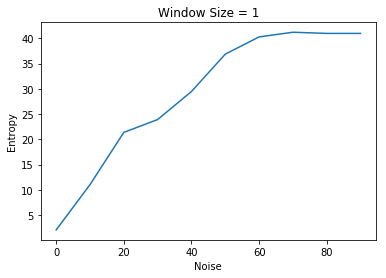

In [94]:
plotter(1)

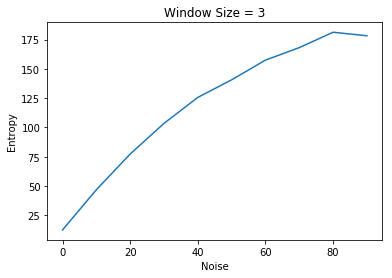

In [95]:
plotter(3)

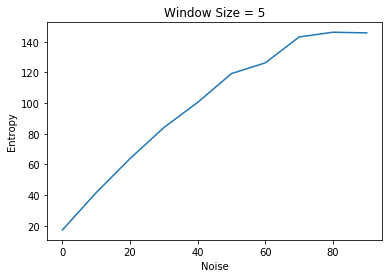

In [96]:
plotter(5)

In [99]:
print("The final plots are")
def plotter(i):
    plt.plot(dataSet[i][0],dataSet[i][1])
    plt.title('Window Size = ' + str(i))
    plt.xlabel('Noise')
    plt.ylabel('Entropy')

The final plots are


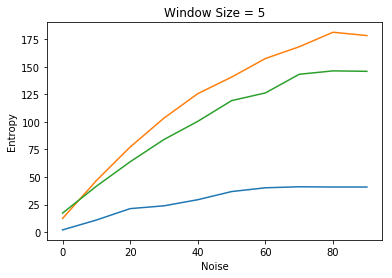

In [101]:
plotter(1)
plotter(3)
plotter(5)
plt.show()

In [ ]:
# Done !